In [1]:
%load_ext line_profiler
%load_ext memory_profiler

In [1]:
import numpy as np
from numba import vectorize
from numba import jit

import torch
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

Linear function: $ \Large y = w.x $

loss:            $ \Large l = \frac{1}{N}.\sum_{i=0}^{N}{(\hat{y} - y)^2} $

## CPU

In [ ]:
def vector_mul():
    a = np.random.rand(100,100)
    b = np.random.rand(100,100)
    return a @ b

In [ ]:
%timeit vector_mul()

In [ ]:
@jit
def jvector_mul():
    a = np.random.rand(100,100)
    b = np.random.rand(100,100)
    return a @ b

In [ ]:
%timeit c = jvector_mul()

## GPU

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

In [ ]:
def gvector_mul():
    a = torch.rand((100,100), device=device)
    b = torch.rand((100,100), device=device)
    c = torch.rand((100,100), device=device)
    c = a @ b
    return c.to('cpu').numpy()



In [ ]:
%timeit gvector_mul()

## Image Processing

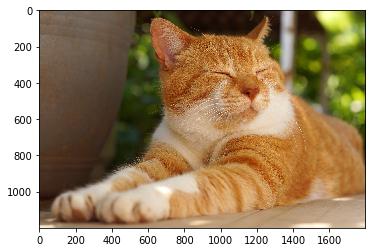

In [3]:
img = cv2.imread('1800x1200_cat_relaxing_on_patio_other.jpg')
cat_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(cat_img)

In [4]:
row, col, ch = cat_img.shape

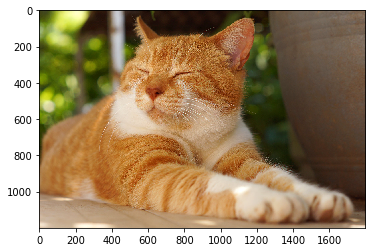

In [5]:
plt.imshow(cat_img[:,::-1])

In [6]:
def green(image):
    img = image.copy()
    for i in range(row):
        for j in range(col):
            a = img[i,j]
            a[0] = 0
            a[2] = 0
            img[i,j] = a
            
    return img

In [7]:
@jit
def vgreen(image):
    img = np.copy(image) 
    for i in range(row):
        for j in range(col):
            a = img[i,j]
            a[0] = 0
            a[2] = 0
            img[i,j] = a
            
    return img

In [9]:
def thresh(image):
    img = image.copy()
    for i in range(row):
        for j in range(col):
            img[i,j] = np.where(img[i,j] > 100, 255, 0)
    return img

In [10]:
@jit
def vthresh(image):
    img = np.copy(image)    
    for i in range(row):
        for j in range(col):
            img[i,j] = np.where(img[i,j] > 100, 255, 0)
    return img

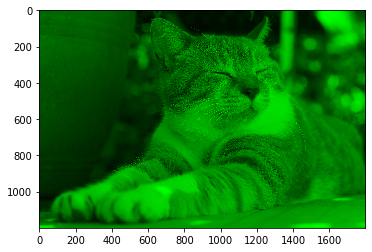

In [11]:
plt.imshow(green(cat_img))

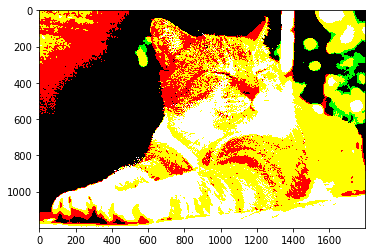

In [12]:
plt.imshow(thresh(cat_img))

In [ ]:
%timeit green(cat_img)

In [ ]:
%timeit thresh(cat_img)

In [ ]:
%timeit vgreen(cat_img)

In [ ]:
%timeit vthresh(cat_img)

In [ ]:
%lprun -f green green(cat_img)

In [ ]:
%memit green(cat_img)

In [4]:
%%writefile mprun_demo.py
def green_cat(image):
    img = image.copy()
    row, col, ch = img.shape
    for i in range(row):
        for j in range(col):
            a = img[i,j]
            a[0] = 0
            a[2] = 0
            img[i,j] = a
            
    return img

Overwriting mprun_demo.py


In [13]:
from mprun_demo import green_cat

In [14]:
%mprun -T mprof0 -f green_cat green_cat(cat_img)

*** KeyboardInterrupt exception caught in code being profiled.

*** Profile printout saved to text file mprof0. *** KeyboardInterrupt exception caught in code being profiled.


In [17]:
%cat mprof0

Filename: /notebooks/D/pytorch_practice/mprun_demo.py

Line #    Mem usage    Increment  Occurences   Line Contents
     1    317.6 MiB    317.6 MiB           1   def green_cat(image):
     2    317.6 MiB      0.0 MiB           1       img = image.copy()
     3    317.6 MiB      0.0 MiB           1       row, col, ch = img.shape
     4    317.6 MiB      0.0 MiB          81       for i in range(row):
     5    317.6 MiB      0.0 MiB      145433           for j in range(col):
     6    317.6 MiB      0.0 MiB      145353               a = img[i,j]
     7    317.6 MiB      0.0 MiB      145353               a[0] = 0
     8    317.6 MiB      0.0 MiB      145353               a[2] = 0
     9    317.6 MiB      0.0 MiB      145352               img[i,j] = a
    10                                                     
    11                                             return img

In [6]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [12]:
test = torch.from_numpy(np.arange([1,5]),dtype=torch.float32)

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [8]:
ones = torch.ones((5,5), device=device)

In [9]:
ones

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], device='cuda:0')